In [1]:
import pickle
from matplotlib import pyplot as plt
import numpy as np 
import scipy.stats
import os

#https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n - 1)
    return m, m - h, m + h

def set_dict_entry(dictionary, keys, value):
    for key in keys[:-1]:
        dictionary = dictionary.setdefault(key, {})
    dictionary[keys[-1]] = value
    
def dict_iterator(dictionary, keys=None):
    if keys is None:
        keys = []
    for key, value in dictionary.items():
        new_keys = keys + [key]
        if isinstance(value, dict):
            for pair in dict_iterator(value, keys=new_keys):
                yield pair
        else:
            yield [new_keys, value]
            
def get_CI(dictionary):
    to_return = {}
    for val in dict_iterator(dictionary):
        utilities = val[1]
        set_dict_entry(to_return, val[0], mean_confidence_interval(utilities))
    return to_return

In [2]:
dir = 'Results/'
results = {}
for file in os.scandir(dir):
    if file.name.endswith('.p'):
        tokens = file.name[:-2].split('_')
        with open(os.path.join(dir, file.name), 'rb') as input_file:
            value = pickle.load(input_file)
        set_dict_entry(results, [tokens[0], tokens[-1]], value)
print(results)

CI_dict = get_CI(results)

print(CI_dict)              

{'pygad': {'200': [79.81933522224426, 57.372020959854126, 57.38503122329712, 57.23391270637512, 57.03586530685425, 57.40347743034363, 57.40818500518799, 57.419477701187134, 57.4336199760437, 57.40931057929993, 57.34152889251709, 57.42881751060486, 57.24107599258423, 57.30924892425537, 57.40173149108887, 57.271424770355225, 57.37610054016113, 57.41807460784912, 57.40631628036499, 57.30650019645691, 57.247358560562134, 57.30129647254944, 57.29353141784668, 57.25694918632507, 57.21789026260376, 57.222437381744385, 57.25328993797302, 57.24396800994873, 57.26023769378662, 57.25041437149048, 57.239123582839966, 57.36236524581909, 57.34986162185669, 57.22783923149109, 57.259202003479004, 57.248361110687256, 57.363200426101685, 57.31522536277771, 57.346123456954956, 57.4092071056366, 57.394739866256714, 57.28745102882385, 57.20672011375427, 57.24789333343506, 57.22089958190918, 57.256447315216064, 57.23188352584839, 57.183820486068726, 57.22778296470642, 57.22354984283447, 57.348005533218384, 

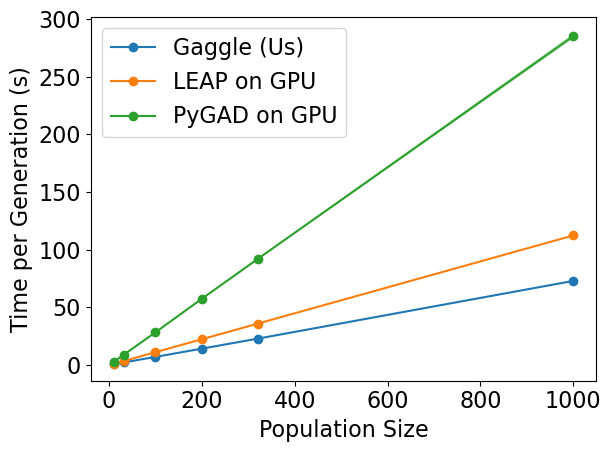

<Figure size 640x480 with 0 Axes>

In [8]:
pop_sizes = [10, 32, 100, 200, 320, 1000]
plt.rcParams.update({'font.size': 16})

nice_names = {'gaggle':'Gaggle (Us)', 'leap': 'LEAP on GPU', 'pygad': 'PyGAD on GPU'}
for algorithm in nice_names:
    result = CI_dict[algorithm]
    values = [result[str(x)][0] for x in pop_sizes]
    lower = [result[str(x)][1] for x in pop_sizes]
    upper = [result[str(x)][2] for x in pop_sizes]
    plt.plot(pop_sizes, values, label=nice_names[algorithm], marker="o")
    plt.fill_between(pop_sizes, lower, upper, alpha=0.3)
        
# plt.title("{} Dataset".format(dataset))
plt.xlabel("Population Size")
plt.ylabel("Time per Generation (s)")
plt.tight_layout()
plt.legend()
plt.plot()
plt.savefig('Results/mnist_plot.png', bbox_inches='tight')
plt.show()
plt.clf()